# M09T01: Anàlisi de sentiment textos
***na gran part de les dades que podem trobar per analitzar utilitzant l'aprenentatge automàtic és text lliure. En aquest sprint veurem com analitzar-lo, netejar-lo i realitzar anàlisi de sentiments.***
 

## Nivell1 - 


### Exercici 1
***Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.***


In [124]:
#Importem les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
pd.options.display.max_columns=None
pd.options.display.max_rows=30

***Incorporament directament un texte en Anglès sobre una amplia crítica de la apelícula Three Thousand Years of Longing de George Miller***

In [125]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
englishFilmreviewWord=word_tokenize(englishFilmreview)
print(englishFilmreviewWord)

['In', 'a', 'much-bruited', 'scene', 'in', 'Jean-Luc', 'Godard', '’', 's', '1966', 'film', 'Pierrot', 'le', 'Fou', ',', 'the', 'sui', 'generis', 'American', 'filmmaker', 'Sam', 'Fuller', 'turns', 'up', 'at', 'a', 'party', 'and', 'is', 'asked', 'by', 'Jean-Paul', 'Belmondo', 'to', 'define', 'cinema', '.', 'He', 'says', ':', '“', 'A', 'film', 'is', 'like', 'a', 'battleground', '.', 'Love', ',', 'hate', ',', 'action', ',', 'violence', ',', 'death', ',', 'in', 'one', 'word', ',', 'emotions', '.', 'Three', 'Thousand', 'Years', 'of', 'Longing', ',', '”', 'the', 'new', 'film', 'directed', 'by', 'the', 'protean', '“', 'Mad', 'Max', ':', 'Fury', 'Road', '”', 'creator', 'George', 'Miller', ',', 'is', 'very', 'much', 'a', 'battleground', '.', 'And', 'very', 'much', 'about', 'the', 'emotion', 'tagged', 'in', 'the', 'title', '.', 'In', 'the', 'case', 'of', 'Alithea', ',', 'the', 'academic', 'played', 'with', 'traits', 'both', 'prim', 'and', 'feisty', 'by', 'Tilda', 'Swinton', ',', 'the', 'longing',

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


***Importem el modul FreqDist per visualitzar la frequència de les paraules***

In [126]:
from nltk.probability import FreqDist
englishFilmreviewFreq = FreqDist(englishFilmreviewWord)
print(englishFilmreviewFreq)

<FreqDist with 434 samples and 908 outcomes>


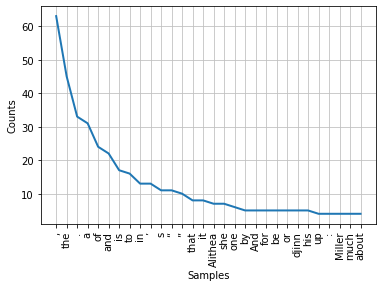

In [127]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
englishFilmreviewFreq.plot(30,cumulative=False)
plt.show()

### Exercici 2
***Treu les stopwords i realitza stemming al teu conjunt de dades.***

***Importem la llibreria stopwords i afegim alguns simbols adicionals que ajudaran a netejar***

In [128]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords=set(stopwords.words("english"))
stopWordsAdd=[",",":",'"','“','”', '’',]
stopWords.update(stopWordsAdd)
print(stopWords)


{'that', 'after', 'weren', 'ourselves', 'then', 'most', "isn't", 'had', "you'd", 'are', "doesn't", 'is', 'won', 'if', 'how', 'some', 'were', 'wasn', "couldn't", 'll', 'don', "haven't", 'now', 'between', 'we', 'as', 'having', 'do', 'very', "shan't", 'off', 'you', 'himself', 'each', 'than', 'yourselves', 'more', 'me', 'hers', '“', "aren't", 'to', 'ma', 'nor', 'for', 'these', 'because', "it's", 'it', 'he', 'hasn', 'your', 'too', 't', 'of', 'all', 'am', 'once', 'but', 'why', "you're", "needn't", '’', 'under', 'same', "don't", 'theirs', 'when', 'isn', ',', 'yourself', 'against', "didn't", 'mustn', 'until', 'such', 'them', "she's", "hasn't", 'with', 'whom', 'only', "you've", 'a', "mightn't", 'myself', 'be', "wasn't", 'from', 'they', 'has', 'needn', "that'll", 'any', 'few', "weren't", 'will', 'own', ':', 'shouldn', 'haven', 'can', 're', 'doesn', "mustn't", 'its', 'been', 'while', 'into', 'again', 'shan', 'did', 'there', 'm', 'at', 'during', 'i', 'on', 'being', 'what', 'y', 'was', 'should', 'o

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
englishFilmreviewStop=[]
for word in englishFilmreviewFreq:
    if word not in stopWords:
        englishFilmreviewStop.append(word)

print("Filterd Sentence:",englishFilmreviewStop)

Filterd Sentence: ['.', 'Alithea', 'one', 'And', 'djinn', 'Miller', 'much', 'movie', '(', ')', 'In', 'film', 'like', 'She', 'The', 'As', 'work', 'tale', 'human', 'turns', 'He', 'battleground', 'hate', 'Fury', 'Road', 'emotion', 'played', 'narratologist', 'put', 'room', 'also', 'hallucination', 'something', 'ancient', 'real', 'wishes', 'funny', 'wish-fulfillment', 'narratives', 'genies', 'end', 'first', 'Sheba', 'Djinn', 'Lagum', 'indeed', 'Solomon', 'things', 'It', 'make', 'selves', 'depicted', 'freedom', 'culture', 'taking', 'I', 'believe', 'much-bruited', 'scene', 'Jean-Luc', 'Godard', '1966', 'Pierrot', 'le', 'Fou', 'sui', 'generis', 'American', 'filmmaker', 'Sam', 'Fuller', 'party', 'asked', 'Jean-Paul', 'Belmondo', 'define', 'cinema', 'says', 'A', 'Love', 'action', 'violence', 'death', 'word', 'emotions', 'Three', 'Thousand', 'Years', 'Longing', 'new', 'directed', 'protean', 'Mad', 'Max', 'creator', 'George', 'tagged', 'title', 'case', 'academic', 'traits', 'prim', 'feisty', 'Tild

***Una vegada netejat el texte de stopwords fem el stemming***

In [130]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmedEnglishFilmreview=[]
for word in englishFilmreviewStop:
    stemmedEnglishFilmreview.append(ps.stem(word))

print("Stemmed Sentence:",stemmedEnglishFilmreview)


Stemmed Sentence: ['.', 'alithea', 'one', 'and', 'djinn', 'miller', 'much', 'movi', '(', ')', 'in', 'film', 'like', 'she', 'the', 'as', 'work', 'tale', 'human', 'turn', 'he', 'battleground', 'hate', 'furi', 'road', 'emot', 'play', 'narratologist', 'put', 'room', 'also', 'hallucin', 'someth', 'ancient', 'real', 'wish', 'funni', 'wish-fulfil', 'narr', 'geni', 'end', 'first', 'sheba', 'djinn', 'lagum', 'inde', 'solomon', 'thing', 'it', 'make', 'selv', 'depict', 'freedom', 'cultur', 'take', 'i', 'believ', 'much-bruit', 'scene', 'jean-luc', 'godard', '1966', 'pierrot', 'le', 'fou', 'sui', 'generi', 'american', 'filmmak', 'sam', 'fuller', 'parti', 'ask', 'jean-paul', 'belmondo', 'defin', 'cinema', 'say', 'a', 'love', 'action', 'violenc', 'death', 'word', 'emot', 'three', 'thousand', 'year', 'long', 'new', 'direct', 'protean', 'mad', 'max', 'creator', 'georg', 'tag', 'titl', 'case', 'academ', 'trait', 'prim', 'feisti', 'tilda', 'swinton', 'long', 'deni', 'introduc', 'voiceov', 'studier', 'sto

### Exercici 3
***Realitza sentiment analysis al teu conjunt de dades.***

***Separaem les frases del texte***

In [131]:
from nltk.tokenize import sent_tokenize

englishFilmreviewTok=sent_tokenize(englishFilmreview)
print(englishFilmreviewTok)

['In a much-bruited scene in Jean-Luc Godard’s 1966 film Pierrot le Fou, the sui generis American filmmaker Sam Fuller turns up at a party and is asked by Jean-Paul Belmondo to define cinema.', 'He says: “A film is like a battleground.', 'Love, hate, action, violence, death, in one word, emotions.', 'Three Thousand Years of Longing,” the new film directed by the protean “Mad Max: Fury Road” creator George Miller, is very much a battleground.', 'And very much about the emotion tagged in the title.', 'In the case of Alithea, the academic played with traits both prim and feisty by Tilda Swinton, the longing is one she denies.', 'Introducing herself in voiceover as a “narratologist,” that is, a studier of stories, she cherishes her solitary self-sufficiency.', 'Arriving in a storybook-bright Istanbul for a conference, she’s put up in the Agatha Christie room of the Pera Palace Hotel.', '“She wrote Death on the Nile here,” Alithea is told.', 'The movie will be about emotion, but also about 

***Visualitzem les frases del texte***

In [132]:
for phrase in englishFilmreviewTok:
    print (phrase)

In a much-bruited scene in Jean-Luc Godard’s 1966 film Pierrot le Fou, the sui generis American filmmaker Sam Fuller turns up at a party and is asked by Jean-Paul Belmondo to define cinema.
He says: “A film is like a battleground.
Love, hate, action, violence, death, in one word, emotions.
Three Thousand Years of Longing,” the new film directed by the protean “Mad Max: Fury Road” creator George Miller, is very much a battleground.
And very much about the emotion tagged in the title.
In the case of Alithea, the academic played with traits both prim and feisty by Tilda Swinton, the longing is one she denies.
Introducing herself in voiceover as a “narratologist,” that is, a studier of stories, she cherishes her solitary self-sufficiency.
Arriving in a storybook-bright Istanbul for a conference, she’s put up in the Agatha Christie room of the Pera Palace Hotel.
“She wrote Death on the Nile here,” Alithea is told.
The movie will be about emotion, but also about storytelling and stories.Duri

***Convertim el resultat en una dataframe per facilitar la manipulacio de les dades i tambbè afegiren columnes relacionades amb l'analisi de sentiments***

In [133]:
englishFilmreviewTokdf = pd.DataFrame (englishFilmreviewTok, columns = ['frase'])

In [134]:
englishFilmreviewTokdf

,frase
0,In a much-bruited scene in Jean-Luc Godard’s 1...
1,He says: “A film is like a battleground.
2,"Love, hate, action, violence, death, in one wo..."
3,"Three Thousand Years of Longing,” the new film..."
4,And very much about the emotion tagged in the ...
...,...
29,The ancient world depicted here is not whitewa...
30,But just the idea of a Black Djinn and a white...
31,Is Miller exercising his freedom as a creative...
32,I believe the former.


***Netegem casa frase de lletres estranyes***

In [135]:
import re

In [136]:
for fras in englishFilmreviewTokdf.frase:
    englishFilmreviewTokdf['fraseClean'] = englishFilmreviewTokdf['frase'].map(lambda x: re.sub('[^A-Za-z0-9]+', ' ',str(x)))

In [137]:
englishFilmreviewTokdf

,frase,fraseClean
0,In a much-bruited scene in Jean-Luc Godard’s 1...,In a much bruited scene in Jean Luc Godard s 1...
1,He says: “A film is like a battleground.,He says A film is like a battleground
2,"Love, hate, action, violence, death, in one wo...",Love hate action violence death in one word em...
3,"Three Thousand Years of Longing,” the new film...",Three Thousand Years of Longing the new film d...
4,And very much about the emotion tagged in the ...,And very much about the emotion tagged in the ...
...,...,...
29,The ancient world depicted here is not whitewa...,The ancient world depicted here is not whitewa...
30,But just the idea of a Black Djinn and a white...,But just the idea of a Black Djinn and a white...
31,Is Miller exercising his freedom as a creative...,Is Miller exercising his freedom as a creative...
32,I believe the former.,I believe the former


***Importem les llibreries necessaaries per fer uan analisis de sentiment***

In [138]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk import sentiment
analitzador = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


***Recorrem cada frase netejada i apliquen polarity_score oper tenir els resultats dels sentiments de cada frase***

In [139]:
neg=[]
pos=[]
neu=[]
comp=[]
for fras in englishFilmreviewTokdf.fraseClean:
    fraseSent = analitzador.polarity_scores(fras)
    for clau in fraseSent:
        if clau == 'neg': 
            neg.append(fraseSent[clau])
        elif clau == 'neu': 
            neu.append(fraseSent[clau])
        elif clau == 'pos': 
            pos.append(fraseSent[clau])
        else: 
            comp.append(fraseSent[clau])

In [140]:
englishFilmreviewTokdf['positiu']=pos
englishFilmreviewTokdf['negatiu']=neg
englishFilmreviewTokdf['neutre']=neu
englishFilmreviewTokdf['compost']=comp

In [141]:
englishFilmreviewTokdf

,frase,fraseClean,positiu,negatiu,neutre,compost
0,In a much-bruited scene in Jean-Luc Godard’s 1...,In a much bruited scene in Jean Luc Godard s 1...,0.076,0.000,0.924,0.4019
1,He says: “A film is like a battleground.,He says A film is like a battleground,0.272,0.293,0.435,-0.0516
2,"Love, hate, action, violence, death, in one wo...",Love hate action violence death in one word em...,0.201,0.560,0.239,-0.8176
3,"Three Thousand Years of Longing,” the new film...",Three Thousand Years of Longing the new film d...,0.000,0.366,0.634,-0.8744
4,And very much about the emotion tagged in the ...,And very much about the emotion tagged in the ...,0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...
29,The ancient world depicted here is not whitewa...,The ancient world depicted here is not whitewa...,0.231,0.000,0.769,0.7579
30,But just the idea of a Black Djinn and a white...,But just the idea of a Black Djinn and a white...,0.000,0.171,0.829,-0.6310
31,Is Miller exercising his freedom as a creative...,Is Miller exercising his freedom as a creative...,0.415,0.000,0.585,0.7964
32,I believe the former.,I believe the former,0.000,0.000,1.000,0.0000


***Analitzem el compound per definir el sentiment de cada frase i fem una gràfica del sentiment per frases***
* En base al compound que va desde -1 a 1 de negatiu a positiu definim si el resultat de cada frase es positiu negatiu o neuutre

***Fem 9 trams desde molt negatiu fins a molt positiu , dividien desde -1 a 1 en trams de 0.25 ja que ens doanarà una visió mes complerta***

In [148]:
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost >0) & (englishFilmreviewTokdf.compost <=0.25) ,'SentimentTotal']='LLeugerament Positiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost >0.25) & (englishFilmreviewTokdf.compost <=0.50) ,'SentimentTotal']='Moderadament  Positiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost >0.50) & (englishFilmreviewTokdf.compost <=0.75) ,'SentimentTotal']='Positiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost >0.75) & (englishFilmreviewTokdf.compost <=1),'SentimentTotal']='Molt Positiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost ==0) ,'SentimentTotal']='Neutral'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost <0) & (englishFilmreviewTokdf.compost >= -0.25) ,'SentimentTotal']='LLeugerament Negatiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost < -0.25) & (englishFilmreviewTokdf.compost >= -0.50) ,'SentimentTotal']='Moderadament  Negatiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost < -0.50) & (englishFilmreviewTokdf.compost >= -0.75) ,'SentimentTotal']='Negatiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost < -0.75) & (englishFilmreviewTokdf.compost >=- 1),'SentimentTotal']='Molt Negatiu'

Text(0.5, 1.0, 'Sentiments a la frase')

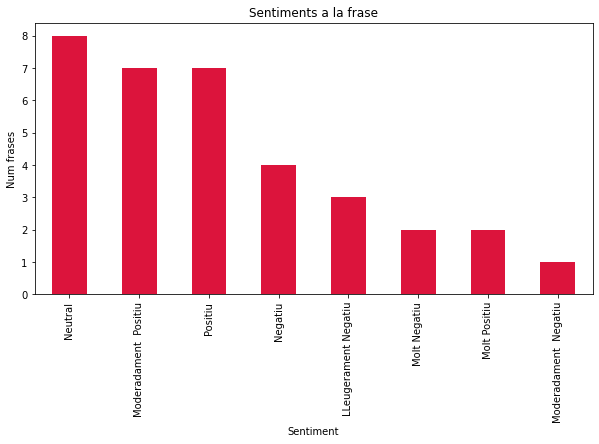

In [149]:
plt.figure(figsize=(10,5)) 
englishFilmreviewTokdf.SentimentTotal.value_counts().plot(kind='bar',color = 'crimson')
plt.xlabel('Sentiment')
plt.ylabel('Num frases')
plt.title('Sentiments a la frase')

*** Fem un mapa de paraules perque amb un cop d'ull podem tenir una represznetacio mes visual del gràfic anterior***
* Instalem a abnaconda el modul wordcloud
* importem les llibreries
* recomposem el text original netejat i en minuscules

In [70]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

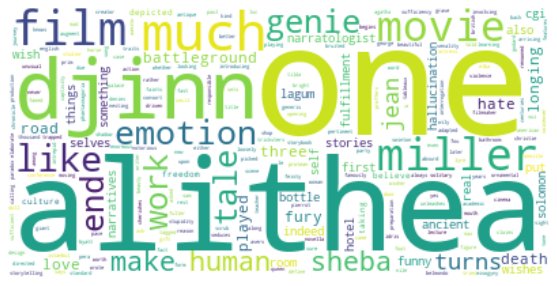

In [71]:
#Limpiamos el texto de letras extrañas
texteNet= ' '.join(englishFilmreviewTokdf['fraseClean'].str.lower())

wordcloud = WordCloud().generate(texteNet)
wordcloud = WordCloud(stopwords=stopWords, background_color="white", max_words=1500).generate(texteNet)
#wordcloud.most_common(20)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***Fem una gràfica de columnes amb les 15 paraules que mes surten al text, farem servir la llibreria collectiobns per iterar***

In [114]:
import collections

<BarContainer object of 15 artists>

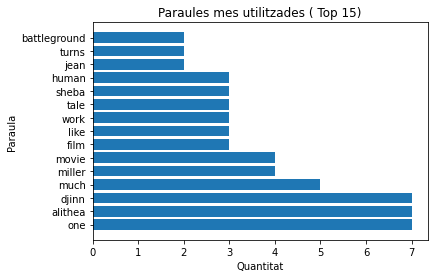

In [120]:
paraulesFiltrades = [word for word in texteNet.split() if word not in stopWords]
contadorParaules = collections.Counter(paraulesFiltrades)

paraules= []
comptador = []
for letter, count in contadorParaules.most_common(15):
    paraules.append(letter)
    comptador.append(count)
    

plt.title('Paraules mes utilitzades ( Top 15)')
plt.xlabel('Quantitat')
plt.ylabel('Paraula')
plt.barh(paraules, comptador)